In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, store_data, data_quants, xlim, cdf_to_tplot
pyspedas.erg.pwe_ofa(trange=['2017-04-24', '2017-04-25'])

11-Feb-24 11:57:16: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/04/
11-Feb-24 11:57:17: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/04/erg_pwe_ofa_l2_spec_20170424_v02_03.cdf


 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132']

In [2]:
pytplot.cdf_to_tplot(['erg_pwe_ofa_l3_property_dsi_20170424_v01_03.cdf'])

['epoch_e132',
 'E_spectra_132',
 'quality_flag_e132',
 'epoch_b132',
 'B_spectra_132',
 'quality_flag_b132',
 'kvec_polar_132',
 'kvec_azimuth_132',
 'polarization_132',
 'planarity_132',
 'kvec_polar_masked_132',
 'kvec_azimuth_masked_132',
 'polarization_masked_132',
 'planarity_masked_132',
 'epoch_p132',
 'Pvec_angle_132',
 'Pvec_angle_masked_132']

In [3]:
vars = pytplot.tplot_names()

0 : erg_pwe_ofa_l2_spec_epoch_e132
1 : erg_pwe_ofa_l2_spec_E_spectra_132
2 : erg_pwe_ofa_l2_spec_quality_flag_e132
3 : erg_pwe_ofa_l2_spec_epoch_b132
4 : erg_pwe_ofa_l2_spec_B_spectra_132
5 : erg_pwe_ofa_l2_spec_quality_flag_b132
6 : epoch_e132
7 : E_spectra_132
8 : quality_flag_e132
9 : epoch_b132
10 : B_spectra_132
11 : quality_flag_b132
12 : kvec_polar_132
13 : kvec_azimuth_132
14 : polarization_132
15 : planarity_132
16 : kvec_polar_masked_132
17 : kvec_azimuth_masked_132
18 : polarization_masked_132
19 : planarity_masked_132
20 : epoch_p132
21 : Pvec_angle_132
22 : Pvec_angle_masked_132


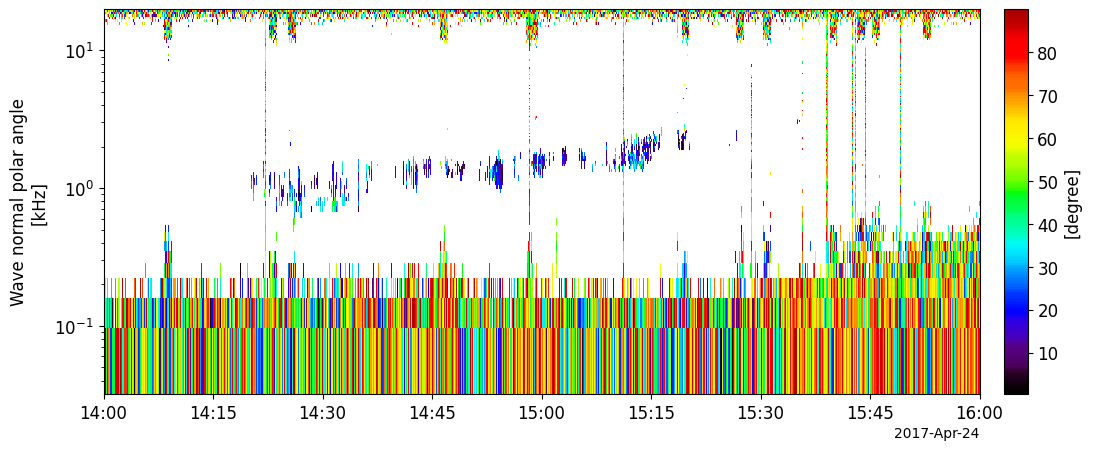

In [4]:
xlim('2017-04-24 14:00:00', '2017-04-24 16:00:00')
tplot('kvec_polar_masked_132')

In [ ]:
spec = data_quants['erg_pwe_ofa_l2_spec_B_spectra_132']
pyspedas.tinterpol('kvec_polar_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', newname='kvec_polar_132_interp')
wna = data_quants['kvec_polar_132_interp']

11-Feb-24 11:52:44: tinterpol error: No pytplot names were provided.


KeyError: 'kvec_polar_132_interp'

In [ ]:
spec_new = spec.where((spec > 0.005)) # chorusの強度が0.005pT^2/Hz以上のという条件で磁場スペクトグラムデータをマスク
spec_bin_lim = spec_new.where((0.5<spec['spec_bins']) & (spec['spec_bins']<3)) # プロットはしてないけどこんな感じで条件を複数組み合わせられる
wna_new = wna.where((spec > 0.005)) # chorusの強度が0.005pT^2/Hz以上のという条件でWNAスペクトグラムデーォをマスク
# 条件は見やすいように変えて使うといいかもしれない

store_data('erg_pwe_ofa_l2_spec_B_spectra_132_new', data={'x': spec_new['time'], 'y': spec_new, 'v': spec['spec_bins']})
store_data('erg_pwe_ofa_l2_kvec_polar_132_new', data={'x': spec_new['time'], 'y': wna_new, 'v': spec['spec_bins']})
options('erg_pwe_ofa_l2_spec_B_spectra_132_new', opt_dict={'ylog': True, 'zlog': True,  'spec': True, 'Colormap': 'jet'})
options('erg_pwe_ofa_l2_kvec_polar_132_new', opt_dict={'ylog': True, 'zlog': False,  'spec': True, 'Colormap': 'jet'})
tplot('erg_pwe_ofa_l2_kvec_polar_132_new')
tplot('erg_pwe_ofa_l2_spec_B_spectra_132_new')